# Deterministic Modelling for T7 and Cre with Iex

In [44]:
from __future__ import division, print_function # Imports from __future__ since we're running Python 2
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
%matplotlib inline
from scipy.integrate import odeint

In [45]:
k_smr = 0.23
k_sr = 15
k_2r = 50
k_Neg_2r = 1e-3
k_rt7 = 960
k_Neg_rt7 = 2.4
k_rcre = 960
k_Neg_rcre = 2.4
k_ry = 960
k_Neg_ry = 2.4
k_dr1 = 3e-7
k_Neg_dr1 = 12
k_dr2 = 3e-7
k_Neg_dr2 = 4.8e3
k_dr3 = 3e-7
k_Neg_dr3 = 4.8e3
k_dr4 = 3e-7
k_Neg_dr4 = 4.8e3
k_ft = 6.1e4
k_p = 0.12
k_Neg_p = 0.1
k_t = 0.92
k_s0mt7 = 0.01
k_s1mt7 = 0.5
k_st7 = 30
k_s0mcre = 0.01
k_s1mcre = 28.3
k_scre = 30
k_s0my = 0.01
k_s1my = 0.5
k_sy = 30

lambda_mr = 0.462
lambda_r = 0.2
lambda_i2r2 = 0.2
lambda_r2 = 0.2
lambda_yiex = 0.2
lambda_mt7 = 0.462
lambda_t7 = 0.2
lambda_mcre = 0.462
lambda_cre = 0.2
lambda_my = 0.462
lambda_y = 0.2

In [46]:
def f(y, t):
     mr = y[0]
     r = y[1]
     r2 = y[2]
     ot7 = y[3]
     ocre = y[4]
     oy = y[5]   
     yiex = y[6]
     i = y[7]
     i2r2 = y[8]
     mt7 = y[9]
     t7 = y[10]
     mcre = y[11]
     cre = y[12]
     my = y[13]   
     lac_Y = y[14]

     f0 = k_smr - lambda_mr*mr
     f1 = k_sr*mr - 2*k_2r*r*r + 2*k_Neg_2r*r2 - lambda_r*r
     f2 = k_2r*r*r - k_Neg_2r*r2 - k_rt7*r2*ot7 + k_Neg_rt7*(2.08-ot7) - k_rcre*r2*ocre + k_Neg_rcre*(208-ocre) - k_ry*r2*oy + k_Neg_ry*(2.08-oy) - k_dr1*i*i*r2 + k_Neg_dr1*i2r2 - lambda_r2*r2
     f3 = -k_rt7*r2*ot7 + k_Neg_rt7*(2.08-ot7) + k_dr2*i*i*(2.08-ot7) - k_Neg_dr2*i2r2*ot7
     f4 = -k_rcre*r2*ocre + k_Neg_rcre*(208-ocre) + k_dr3*i*i*(208-ocre) - k_Neg_dr3*i2r2*ocre
     f5 = -k_ry*r2*oy + k_Neg_ry*(2.08-oy) + k_dr4*i*i*(2.08-oy) - k_Neg_dr4*i2r2*oy
     f6 = -(k_ft + k_Neg_p)*yiex + k_p*lac_Y*iex - lambda_yiex*yiex  
     f7 = -2*k_dr1*r2*i*i + 2*k_Neg_dr1*i2r2 - 2*k_dr2*(2.08-ot7)*i*i + 2*k_Neg_dr2*ot7*i2r2 - 2*k_dr3*(208-ocre)*i*i + 2*k_Neg_dr3*ocre*i2r2 - 2*k_dr4*(2.08-oy)*i*i + 2*k_Neg_dr4*oy*i2r2 + k_ft*yiex + k_t*(iex-i) + 2*lambda_i2r2*i2r2 + lambda_yiex*yiex
     f8 = k_dr1*i*i*r2 - k_Neg_dr1*i2r2 + k_dr2*i*i*(2.08-ot7) - k_Neg_dr2*i2r2*ot7 + k_dr3*i*i*(208-ocre) - k_Neg_dr3*i2r2*ocre + k_dr4*i*i*(2.08-oy) - k_Neg_dr4*i2r2*oy - lambda_i2r2*i2r2
     f9 = k_s0mt7*(2.08-ot7) + k_s1mt7*ot7 - lambda_mt7*mt7
     f10 = k_st7*mt7 - lambda_t7*t7   
     f11 = k_s0mcre*(208-ocre)*t7 + k_s1mcre*ocre*t7 - lambda_mcre*mcre
     f12 = k_scre*mcre - lambda_cre*cre
     f13 = k_s0my*(2.08-oy) + k_s1my*oy - lambda_my*my
     f14 = k_sy*my + (k_ft + k_Neg_p)*yiex - k_p*lac_Y*iex - lambda_y*lac_Y
     return [f0, f1, f2, f3, f4, f5, f6, f7, f8, f9, f10, f11, f12, f13, f14]


In [47]:
mr_0 = 0
r_0 = 0
r2_0 = 0
ot7_0 = 2.08
ocre_0 = 208
oy_0 = 2.08
mt7_0 = 0
t7_0 = 0
mcre_0 = 0
cre_0 = 0
i_0 = 0
i2r2_0 = 0
my_0 = 0
lac_Y_0 = 0
yiex_0 = 0 
    
y0 = [mr_0, r_0, r2_0, ot7_0, ocre_0, oy_0, mt7_0, t7_0, mcre_0, cre_0, i_0, i2r2_0, my_0, lac_Y_0, yiex_0]     
t  = np.linspace(0, 400, 1000) 

In [40]:
#iex = 100000
soln = odeint(f, y0, t)

mr = soln[:, 0]
r = soln[:, 1]
r2 = soln[:, 2]
ot7 = soln[:, 3]
ocre = soln[:, 4]
oy = soln[:,5]
mt7 = soln[:, 6]
t7 = soln[:, 7]
mcre = soln[:, 8]
cre = soln[:, 9]
i = soln[:, 10]
i2r2 = soln[:, 11]
my = soln[:, 12]
lac_Y = soln[:, 13]
yiex = soln[:, 14]

[0.2722697063606172, 0.2722697063606172, 0.2722697063606172, 0.2722697063606172, 0.2722697063606172, 0.2722697063606172, 0.2722697063606172, 0.2722697063606172, 0.2722697063606172, 0.2722697063606172, 0.2722697063606172, 0.2722697063606172, 0.2722697063606172, 0.2722697063606172, 0.2722697063606172, 0.2722697063606172, 0.2722697063606172, 0.2722697063606172, 0.2722697063606172, 0.2722697063606172, 0.2722697063606172, 0.2722697063606172, 0.2722697063606172, 0.2722697063606172, 0.2722697063606172, 0.2722697063606172, 0.2722697063606172, 0.2722697063606172, 0.2722697063606172, 0.2722697063606172]


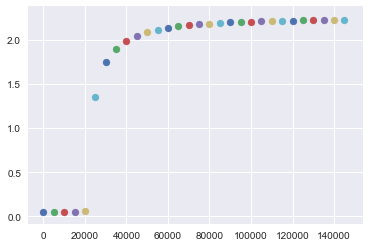

In [57]:
lacI = []
for iex in range(0, 150000, 5000):
    soln = odeint(f, y0, t)
    lac_Y = soln[:, 13]
    
    lacI.append(r[999])
    plt.scatter(iex, lac_Y[999])
print(lacI) 

[0.045319200666108464, 0.045425322827141359, 0.045744102767896318, 0.046281223744387104, 0.047048659178025164, 0.048065210169902402, 0.049358155226045856, 0.050965920157384055, 0.052942363184908893, 0.055363842534954473, 0.058341399602744426, 0.062044285310143409, 1.1170823052531105, 1.4781281201026415, 1.6396063509209833, 1.7438349739201044, 1.8190555687888845, 1.8764656307029683, 1.9218493747906342, 1.9586296544000308]


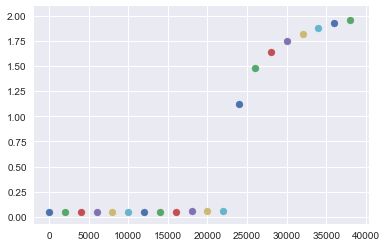

In [50]:
lacY = []
for iex in range(0, 40000, 2000):
    soln = odeint(f, y0, t)
    lac_Y = soln[:, 13]
    
    lacY.append(lac_Y[999])
    plt.scatter(iex, lac_Y[999])
print(lacY) 

In [27]:
plt.ion()
plt.rcParams['figure.figsize'] = 10, 8

2.23438918124


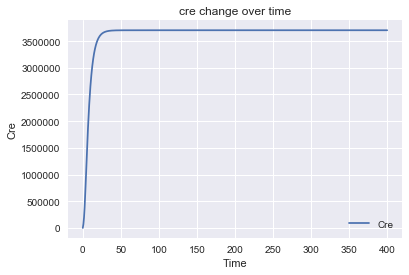

In [35]:
plt.figure()
plt.plot(t, t7, label='Cre')
plt.xlabel('Time')
plt.ylabel('Cre')
plt.title('cre change over time')
plt.legend(loc=0)

axes = plt.gca()
#axes.set_ylim([0,6000])
#axes.set_xlim([0,120])
print(lac_Y[999])

[6.7978801044786463, 7.0711018169164612, 8.420431548488283, 246.99824081771177, 276.58692312374421, 284.70608496466821, 286.3144286693809, 285.21207329990591, 282.80864679848452, 279.73446069813241, 276.30655208826681, 272.69785791159109, 269.00834907076808, 265.29827023343336, 261.60497938174097, 257.95203925430866, 254.35439186820835, 250.82142885986957, 247.35888242276033, 243.97002799232817]


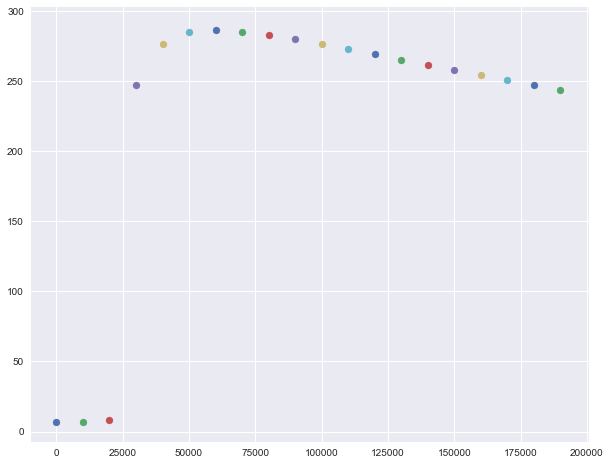

In [31]:
lacY = []
for iex in range(0, 200000, 10000):
    soln = odeint(f, y0, t)

    mr = soln[:, 0]
    r = soln[:, 1]
    r2 = soln[:, 2]
    o = soln[:, 3]
    i = soln[:, 4]
    i2r2 = soln[:, 5]
    my = soln[:, 6]
    lac_Y = soln[:, 7]
    yiex = soln[:, 8]
    
    lacY.append(lac_Y[999])
    plt.scatter(iex, lac_Y[999])
print(lacY)    